In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import os
import glob
import codecs
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
import prepare

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
#ATP MAIN file
df = pd.read_csv('ATPMain.csv')
df.head(1)

,Unnamed: 0,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won
0,0,2019-M020,Brisbane,Hard,32,A,20181231,300,6-4 3-6 6-2,3,F,124.0,Daniil Medvedev,Kei Nishikori,22.885695,29.004791,NaN,NaN,R,R,198.0,178.0,106421,105453,RUS,JPN,Daniil Medvedev,Kei Nishikori,16.0,9.0,1977.0,3590.0,4.0,2.0,8.0,3.0,6.0,3.0,100.0,77.0,54.0,44.0,34.0,31.0,20.0,17.0,14.0,13.0,10.0,3.0,15.0,6.0,Kei Nishikori,0.54,0.571429,0.62963,0.704545,3.0,5.0


In [4]:
#pull prepare
df = prepare.prepare_atp()
df.shape

(35969, 75)

In [5]:
df.head(1)

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,surface_Clay,surface_Grass,surface_Hard,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_R,player_2_hand_R,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-01-11,1999-338,Sydney,Hard,32,A,16,7-6(1) 6-1,3,R32,84.0,Lleyton Hewitt,Patrick Rafter,17.878166,26.036961,NaN,NaN,R,R,180.0,185.0,103720,102158,AUS,AUS,Lleyton Hewitt,Patrick Rafter,104.0,4.0,456.0,3315.0,NaN,2.0,2.0,0.0,0.0,5.0,73.0,59.0,51.0,36.0,32.0,24.0,14.0,8.0,10.0,9.0,4.0,3.0,6.0,7.0,Lleyton Hewitt,0.69863,0.610169,0.627451,0.666667,4.0,2.0,True,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0


In [6]:
#split
train, validate, test = prepare.split_data(df)
train.shape, validate.shape, test.shape

((20142, 75), (8633, 75), (7194, 75))

In [7]:
# Creating 4 dataframes for Grandslams
Roland_Garros_df = df[df.tourney_name == 'Roland Garros']
Wimbledon_df = df[df.tourney_name == 'Wimbledon']
US_Open_df = df[df.tourney_name == 'US Open']
Australian_Open_df = df[df.tourney_name == 'Australian Open']


In [8]:
# GROUPED
grand_list = ['Roland Garros', 'Wimbledon', 'US Open', 'Australian Open']
grand_df = df[df['tourney_name'].isin(grand_list)]
grand_df.shape

(7277, 75)

In [9]:
grand_df.isnull().sum()

tourney_id       0
tourney_name     0
surface          0
draw_size        0
tourney_level    0
                ..
round_R16        0
round_R32        0
round_R64        0
round_RR         0
round_SF         0
Length: 75, dtype: int64

In [10]:
df.isnull().sum()

tourney_id       0
tourney_name     0
surface          0
draw_size        0
tourney_level    0
                ..
round_R16        0
round_R32        0
round_R64        0
round_RR         0
round_SF         0
Length: 75, dtype: int64

In [11]:
### Might be useful for later

def total_games(s):
    num_list = re.findall('\d+', s)
    num_list = [int(x) for x in num_list]
    return sum(num_list)

df['total_games'] = df['score'].apply(total_games)
df

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,surface_Clay,surface_Grass,surface_Hard,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_R,player_2_hand_R,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF,total_games
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-01-11,1999-338,Sydney,Hard,32,A,16,7-6(1) 6-1,3,R32,84.0,Lleyton Hewitt,Patrick Rafter,17.878166,26.036961,NaN,NaN,R,R,180.0,185.0,103720,102158,AUS,AUS,Lleyton Hewitt,Patrick Rafter,104.0,4.0,456.0,3315.0,NaN,2.0,2.0,0.0,0.0,5.0,73.0,59.0,51.0,36.0,32.0,24.0,14.0,8.0,10.0,9.0,4.0,3.0,6.0,7.0,Lleyton Hewitt,0.698630,0.610169,0.627451,0.666667,4.0,2.0,True,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,21
1999-01-11,1999-338,Sydney,Hard,32,A,15,5-7 6-3 6-2,3,R32,115.0,Martin Damm Sr,Nicolas Kiefer,26.444901,21.519507,Q,NaN,R,R,188.0,183.0,210013,103017,CZE,GER,Martin Damm Sr,Nicolas Kiefer,75.0,36.0,657.0,1007.0,NaN,NaN,8.0,6.0,2.0,4.0,84.0,86.0,52.0,38.0,40.0,31.0,11.0,32.0,14.0,15.0,3.0,2.0,6.0,3.0,Nicolas Kiefer,0.619048,0.441860,0.769231,0.815789,1.0,3.0,False,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,29
1999-01-11,1999-338,Sydney,Hard,32,A,14,6-2 6-4,3,R32,61.0,Jan Siemerink,Mariano Puerta,28.744695,20.312115,NaN,NaN,L,L,183.0,180.0,101733,103264,NED,ARG,Jan Siemerink,Mariano Puerta,19.0,38.0,1664.0,983.0,NaN,NaN,1.0,1.0,7.0,1.0,51.0,46.0,24.0,31.0,15.0,25.0,14.0,11.0,9.0,9.0,3.0,0.0,6.0,0.0,Mariano Puerta,0.470588,0.673913,0.625000,0.806452,0.0,3.0,False,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18
1999-01-11,1999-338,Sydney,Hard,32,A,13,6-1 6-3,3,R32,43.0,Hicham Arazi,Todd Martin,25.229295,28.511978,NaN,NaN,L,R,175.0,198.0,102271,101774,MAR,USA,Hicham Arazi,Todd Martin,34.0,16.0,1069.0,1774.0,NaN,8.0,2.0,10.0,3.0,0.0,47.0,36.0,27.0,27.0,16.0,25.0,6.0,7.0,8.0,8.0,1.0,0.0,5.0,0.0,Todd Martin,0.574468,0.750000,0.592593,0.925926,0.0,4.0,False,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,16
1999-01-11,1999-338,Sydney,Hard,32,A,12,6-3 7-6(4),3,R32,85.0,Carlos Moya,Thomas Johansson,22.373717,23.802875,NaN,NaN,R,R,190.0,180.0,102845,102563,ESP,SWE,Carlos Moya,Thomas Johansson,5.0,17.0,3159.0,1761.0,3.0,NaN,7.0,8.0,1.0,2.0,79.0,58.0,37.0,26.0,28.0,19.0,22.0,17.0,11.0,10.0,5.0,2.0,7.0,5.0,Carlos Moya,0.468354,0.448276,0.756757,0.730769,3.0,2.0,True,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-23,2019-M-DC-2019-FLS-M-GBR-ESP-01,Davis Cup Finals SF: GBR vs ESP,Hard,4,D,2,6-4 6-0,3,RR,85.0,Daniel Evans,Rafael Nadal,29.489391,33.459274,NaN,NaN,R,L,175.0,185.0,105554,104745,GBR,ESP,Daniel Evans,Rafael Nadal,42.0,1.0,1124.0,9985.0,NaN,NaN,4.0,9.0,2.0,0.0,59.0,46.0,43.0,29.0,24.0,24.0,5.0,11.0,8.0,8.0,5.0,0.0,9.0,0.0,Rafael Nadal,0.728814,0.63

In [12]:
df.tourney_level.value_counts()

A    20063
M     8122
G     7277
F      295
D      212
Name: tourney_level, dtype: int64

- A = 
- M = 
- G = Grand Slam
- F = 
- D = Davis Cup

In [13]:
df.head(1)

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,surface_Clay,surface_Grass,surface_Hard,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_R,player_2_hand_R,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF,total_games
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-01-11,1999-338,Sydney,Hard,32,A,16,7-6(1) 6-1,3,R32,84.0,Lleyton Hewitt,Patrick Rafter,17.878166,26.036961,NaN,NaN,R,R,180.0,185.0,103720,102158,AUS,AUS,Lleyton Hewitt,Patrick Rafter,104.0,4.0,456.0,3315.0,NaN,2.0,2.0,0.0,0.0,5.0,73.0,59.0,51.0,36.0,32.0,24.0,14.0,8.0,10.0,9.0,4.0,3.0,6.0,7.0,Lleyton Hewitt,0.69863,0.610169,0.627451,0.666667,4.0,2.0,True,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,21


In [ ]:
# df.index = range(df.shape[0])
# df

In [14]:
# RET means a player quit mid match - 
# This list shows 

ret = df[df.score.str.contains('RET')== True]
ret.winner.value_counts().head(20)

Rafael Nadal              18
Feliciano Lopez           14
Roger Federer             14
Novak Djokovic            14
Andreas Seppi             13
Juan Carlos Ferrero       13
Mikhail Youzhny           13
Juan Monaco               12
Richard Gasquet           12
Lleyton Hewitt            11
Jurgen Melzer             11
Marcos Baghdatis          11
Victor Hanescu            11
Philipp Kohlschreiber     11
Tommy Robredo             10
Sam Querrey               10
Olivier Rochus            10
Andy Roddick              10
Guillermo Garcia Lopez    10
Marin Cilic               10
Name: winner, dtype: int64

High-priority rivalries

- Roger Federer vs Andy Murray
- Roger Federer vs Rafael Nadal
- Roger Federer vs Novak Djokovic
- Roger Federer vs Marat Safin
- Roger Federer vs Stanislas Wawrinka
- Roger Federer vs Juan Martin Del Potro
- Roger Federer vs Andy Roddick
- Roger Federer vs David Nalbandian
- Roger Federer vs David Ferrer
- Roger Federer vs Nikolay Davydenko
- Roger Federer vs Richard Gasquet
- Roger Federer vs Jo-Wilfried Tsonga
- Roger Federer vs Fernando Gonzalez


## Andy Roddick vs Roger Federer

In [195]:
from datetime import datetime

#Player 1 is always alphabetically first - Andy
Rodrick_Federer = df[df.player_1 == 'Andy Roddick']
#Player 2 will be Roger
Rodrick_Federer = Rodrick_Federer[Rodrick_Federer.player_2 == 'Roger Federer']

#They played 17 matches against each other
Rodrick_Federer.shape

(17, 76)

In [196]:
### Counts of wins
Rodrick_Federer.winner.value_counts()

Roger Federer    14
Andy Roddick      3
Name: winner, dtype: int64

In [197]:
Rodrick_Federer[Rodrick_Federer.winner == 'Andy Roddick']

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,surface_Clay,surface_Grass,surface_Hard,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_R,player_2_hand_R,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF,total_games
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-08-04,2003-421,Canada Masters,Hard,64,M,62,6-4 3-6 7-6(3),3,SF,116.0,Andy Roddick,Roger Federer,20.928131,21.987680,NaN,NaN,R,R,188.0,185.0,104053,103819,USA,SUI,Andy Roddick,Roger Federer,7.0,3.0,2630.0,3690.0,6.0,3.0,9.0,9.0,2.0,10.0,85.0,100.0,41.0,56.0,32.0,47.0,28.0,19.0,15.0,16.0,0.0,7.0,2.0,9.0,Andy Roddick,0.482353,0.560000,0.780488,0.839286,2.0,2.0,True,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,35
2008-03-27,2008-403,Miami Masters,Hard,96,M,89,7-6(4) 4-6 6-3,3,QF,115.0,Andy Roddick,Roger Federer,25.566051,26.625599,NaN,NaN,R,R,188.0,185.0,104053,103819,USA,SUI,Andy Roddick,Roger Federer,6.0,1.0,2160.0,6550.0,6.0,1.0,17.0,7.0,1.0,1.0,101.0,85.0,70.0,54.0,54.0,40.0,15.0,19.0,16.0,15.0,2.0,0.0,3.0,1.0,Andy Roddick,0.693069,0.635294,0.771429,0.740741,1.0,1.0,True,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,36
2012-03-21,2012-403,Miami Masters,Hard,96,M,69,7-6(4) 1-6 6-4,3,R32,121.0,Andy Roddick,Roger Federer,29.552361,30.611910,NaN,NaN,R,R,188.0,185.0,104053,103819,USA,SUI,Andy Roddick,Roger Federer,34.0,3.0,1165.0,9350.0,31.0,3.0,12.0,11.0,2.0,1.0,94.0,75.0,65.0,44.0,48.0,37.0,15.0,19.0,15.0,14.0,7.0,1.0,10.0,2.0,Andy Roddick,0.691489,0.586667,0.738462,0.840909,1.0,3.0,True,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,34


In [198]:
Rodrick_Federer[Rodrick_Federer.winner == 'Roger Federer']

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,surface_Clay,surface_Grass,surface_Hard,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_R,player_2_hand_R,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF,total_games
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-10-22,2001-328,Basel,Carpet,32,A,26,3-6 6-3 7-6(5),3,QF,101.0,Andy Roddick,Roger Federer,19.145791,20.205339,NaN,NaN,R,R,188.0,185.0,104053,103819,USA,SUI,Andy Roddick,Roger Federer,16.0,13.0,1610.0,1745.0,6.0,4.0,9.0,11.0,1.0,2.0,93.0,84.0,54.0,51.0,41.0,43.0,22.0,18.0,15.0,15.0,4.0,1.0,6.0,3.0,Roger Federer,0.580645,0.607143,0.759259,0.843137,2.0,2.0,False,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,36
2003-06-23,2003-540,Wimbledon,Grass,128,G,125,7-6(6) 6-3 6-3,5,SF,103.0,Andy Roddick,Roger Federer,20.813142,21.872690,NaN,NaN,R,R,188.0,185.0,104053,103819,USA,SUI,Andy Roddick,Roger Federer,6.0,5.0,2390.0,2580.0,5.0,4.0,4.0,17.0,0.0,0.0,99.0,84.0,57.0,51.0,42.0,42.0,21.0,25.0,15.0,15.0,5.0,2.0,8.0,2.0,Roger Federer,0.575758,0.607143,0.736842,0.823529,0.0,3.0,False,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,37
2003-11-10,2003-605,Masters Cup,Hard,8,F,4,7-6(2) 6-2,3,SF,62.0,Andy Roddick,Roger Federer,21.196441,22.255989,NaN,NaN,R,R,188.0,185.0,104053,103819,USA,SUI,Andy Roddick,Roger Federer,1.0,3.0,4335.0,3625.0,NaN,NaN,5.0,12.0,1.0,2.0,63.0,56.0,46.0,31.0,34.0,27.0,6.0,19.0,10.0,10.0,0.0,0.0,2.0,0.0,Roger Federer,0.730159,0.553571,0.739130,0.870968,0.0,2.0,False,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,23
2004-06-21,2004-540,Wimbledon,Grass,128,G,127,4-6 7-5 7-6(3) 6-4,5,F,151.0,Andy Roddick,Roger Federer,21.809719,22.869268,NaN,NaN,R,R,188.0,185.0,104053,103819,USA,SUI,Andy Roddick,Roger Federer,2.0,1.0,4695.0,5610.0,2.0,1.0,11.0,12.0,5.0,3.0,133.0,154.0,81.0,95.0,60.0,64.0,21.0,34.0,22.0,22.0,5.0,10.0,10.0,14.0,Roger Federer,0.609023,0.616883,0.740741,0.673684,4.0,5.0,False,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,48
2004-07-26,2004-421,Canada Masters,Hard,64,M,63,7-5 6-3,3,F,85.0,Andy Roddick,Roger Federer,21.905544,22.965092,NaN,NaN,R,R,188.0,185.0,104053,103819,USA,SUI,Andy Roddick,Roger Federer,2.0,1.0,4945.0,5665.0,2.0,1.0,4.0,13.0,2.0,1.0,72.0,65.0,49.0,38.0,33.0,28.0,11.0,19.0,10.0,11.0,7.0,4.0,9.0,4.0,Roger Federer,0.680556,0.584615,0.673469,0.736842,0.0,2.0,False,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,21
2005-06-20,2005-540,Wimbledon,Grass,128,G,127,6-2 7-6(2) 6-4,5,F,101.0,Andy Roddick,Roger Federer,22.806297,23.865845,NaN,NaN,R,R,188.0,185.0,104053,103819,USA,SUI,Andy Roddick,Roger Federer,4.0,1.0,3590.0,6980.0,2.0,1.0,7.0,12.0,1.0,0.0,96.0,79.0,68.0,49.0,46.0,40.0,11.0,22.0,15.0,15.0,5.0,1.0,9.0,2.0,Roger Federer,0.708333,0.620253,0.676471,0.816327,1.0,4.0,False,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,33
2005-08-15,2005-422,Cincinnati Masters,Hard,64,M,63,6-3 7-5,3,F,75.0,Andy Roddick,Roger Federer,22.959617,24.019165,NaN,NaN,R,R,188.0,185.0,104053,103819,USA,SUI,Andy Roddick,Roger Federer,5.0,1.0,3130.0,6500.0,5.0,1.0,11.

In [199]:
Rodrick_Federer['year'] = (Rodrick_Federer['tourney_id'].str[0:4]).astype(int)
Rodrick_Federer.year

tourney_date
2001-10-22    2001
2003-06-23    2003
2003-08-04    2003
2003-11-10    2003
2004-06-21    2004
2004-07-26    2004
2005-06-20    2005
2005-08-15    2005
2006-08-28    2006
2006-11-13    2006
2007-01-15    2007
2007-08-27    2007
2007-11-12    2007
2008-03-27    2008
2009-01-19    2009
2009-03-25    2009
2012-03-21    2012
Name: year, dtype: int64

In [200]:
## Let's look at their aggregated stats
PlayerDatabase = pd.read_csv('PlayerData.csv')
PlayerDatabase[PlayerDatabase.MaxRank == 1]

,Unnamed: 0,PlayerID,Player_Name,Age,Height,MaxRank,Hand,Country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_count,aces_per_game,first_serve_percentage_match_lost,first_serve_percentage_match_won,first_serve_won_percentage_match_lost,first_serve_won_percentage_match_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,breakpoints_per_game,win_count_30,loss_count_30,win_count_100,loss_count_100,total_top30_matches,total_top100_matches,top_30_win%,top_100_win%,hard_surface_win,hard_surface_loss,hard_surface_match_count,hard_win%,clay_surface_win,clay_surface_loss,clay_surface_match_count,clay_win%,grass_surface_win,grass_surface_loss,grass_surface_match_count,grass_win%,carpet_surface_win,carpet_surface_loss,carpet_surface_match_count,carpet_win%
0,0,103720,Lleyton Hewitt,20.752909,180.0,1.0,R,AUS,458.0,196.0,654.0,0.70,183.0,422.0,605.0,0.925,0.525558,0.539098,0.675974,0.773470,183.0,422.0,605.0,0.925076,134.0,110.0,351.0,184.0,244.0,535.0,0.549180,0.656075,265.0,118.0,383.0,0.691906,85.0,46.0,131.0,0.648855,93.0,27.0,120.0,0.775000,15.0,5.0,20.0,0.750000
8,8,102845,Carlos Moya,22.546201,190.0,1.0,R,ESP,297.0,167.0,464.0,0.64,162.0,282.0,444.0,0.957,0.576697,0.587575,0.674769,0.769395,162.0,282.0,444.0,0.956897,80.0,80.0,221.0,149.0,160.0,370.0,0.500000,0.597297,102.0,79.0,181.0,0.563536,181.0,76.0,257.0,0.704280,7.0,7.0,14.0,0.500000,7.0,5.0,12.0,0.583333
13,16,102856,Gustavo Kuerten,24.347707,190.0,1.0,R,BRA,202.0,106.0,308.0,0.66,94.0,184.0,278.0,0.903,0.552564,0.556285,0.718379,0.796136,94.0,184.0,278.0,0.902597,52.0,53.0,145.0,89.0,105.0,234.0,0.495238,0.619658,72.0,51.0,123.0,0.585366,108.0,40.0,148.0,0.729730,7.0,4.0,11.0,0.636364,15.0,11.0,26.0,0.576923
33,40,103498,Marat Safin,20.835044,193.0,1.0,R,RUS,319.0,180.0,499.0,0.64,161.0,292.0,453.0,0.908,0.552617,0.556719,0.707889,0.788261,161.0,292.0,453.0,0.907816,97.0,80.0,252.0,161.0,177.0,413.0,0.548023,0.610169,158.0,95.0,253.0,0.624506,94.0,55.0,149.0,0.630872,22.0,14.0,36.0,0.611111,45.0,16.0,61.0,0.737705
66,82,102338,Yevgeny Kafelnikov,25.221081,190.0,1.0,R,RUS,223.0,112.0,335.0,0.67,101.0,206.0,307.0,0.916,0.537804,0.560409,0.678835,0.773852,101.0,206.0,307.0,0.916418,60.0,50.0,174.0,102.0,110.0,276.0,0.545455,0.630435,118.0,52.0,170.0,0.694118,42.0,41.0,83.0,0.506024,18.0,9.0,27.0,0.666667,45.0,10.0,55.0,0.818182
67,85,101736,Andre Agassi,29.412731,180.0,1.0,R,USA,230.0,76.0,306.0,0.75,73.0,226.0,299.0,0.977,0.602926,0.624271,0.681651,0.770387,73.0,226.0,299.0,0.977124,82.0,44.0,186.0,68.0,126.0,254.0,0.650794,0.732283,161.0,47.0,208.0,0.774038,39.0,16.0,55.0,0.709091,23.0,9.0,32.0,0.718750,7.0,4.0,11.0,0.636364
90,133,103819,Roger Federer,22.485969,185.0,1.0,R,SUI,907.0,212.0,1119.0,0.81,202.0,866.0,1068.0,0.954,0.597457,0.629201,0.701538,0.796579,202.0,866.0,1068.0,0.954424,407.0,146.0,786.0,200.0,553.0,986.0,0.735986,0.797160,552.0,120.0,672.0,0.821429,189.0,57.0,246.0,0.768293,132.0,19.0,151.0,0.874172,34.0,16.0,50.0,0.680000
101,205,101948,Pete Sampras,27.550992,185.0,1.0,R,USA,119.0,49.0,168.0,0.71,47.0,116.0,163.0,0.970,0.588892,0.606749,0.746246,0.829313,47.0,116.0,163.0,0.970238,40.0,29.0,97.0,48.0,69.0,145.0,0.579710,0.668966,79.0,26.0,105.0,0.752381,14.0,17.0,31.0,0.451613,26.0,6.0,32.0,0.812500,0.0,0.0,0.0,0.000000
106,230,103507,Juan Carlos Ferrero,23.589322,183.0,1.0,R,ESP,353.0,190.0,543.0,0.65,183.0,332.0,515.0,0.948,0.637765,0.640235,0.629894,0.733483,183.0,332.0,515.0,0.948435,98.0,96.0,284.0,179.0,194.0,463.0,0.505155,0.613391,133.0,94.0,227.0,0.585903,192.0,72.0,264.0,0.727273,18.0,14.0,32.0,0.562500,10.0,10.0,20.0,0.500000
189,756,104745,Rafael Nadal,22.228611,185.0,1.0,L,ESP,741.0,146.0,887.0,0.84,142.0,724.0,866.0,0.976,0.680257,0.683340,0.637243,0.748767,142.0,724.0,866.0,0.976325,339.0,109.0,643.0,136.0,448.0,779.0,0.756696,0.825417,354.0,101.0,455.0,0.778022,339.0,27.0,366.0,0.926230,46.0,15.0,61.0,0.754098,2.0,3.0,5.0,0.400000


In [201]:
years = [i for i in range(1999, 2019)]
fedwins = [0 for i in range(1999, 2019)]
rodwins = [0 for i in range(1999, 2019)]

for index, row in Rodrick_Federer.iterrows():
    if row['winner'] == "Andy Roddick":
        rodwins[row['year'] - 1999] += 1
    elif row['winner'] == "Roger Federer":
        fedwins[row['year'] - 1999] += 1
    

In [ ]:
# # set width of bar
# barWidth = 0.25
# fig = plt.subplots(figsize =(12, 8))
 
# # set height of bar
# IT = [12, 30, 1, 8, 22]
# ECE = [28, 6, 16, 5, 10]
# CSE = [29, 3, 24, 25, 17]
 
# # Set position of bar on X axis
# br1 = np.arange(len(IT))
# br2 = [x + barWidth for x in br1]
# br3 = [x + barWidth for x in br2]

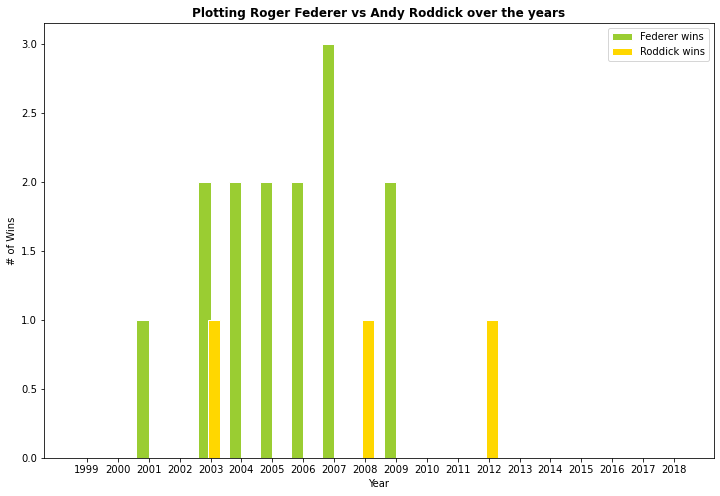

In [202]:
plt.figure(figsize=(12,8))

#barwith and position
barWidth = 0.4
b1 = np.arange(len(fedwins))
b2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, fedwins, color='#9ACD32', width=barWidth, edgecolor='white', label='Federer wins')
plt.bar(r2, rodwins, color='#FFD700', width=barWidth, edgecolor='white', label='Roddick wins')
 
# Add xticks on the middle of the group bars
plt.title('Plotting Roger Federer vs Andy Roddick over the years', fontweight='bold')
plt.xticks([r + barWidth - 0.2 for r in range(len(fedwins))], [i for i in range(1999, 2019)])
plt.xlabel("Year")
plt.ylabel("# of Wins");
 
# Create legend & Show graphic
plt.legend();

In [115]:
Rodrick_Federer.head(1)

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,surface_Clay,surface_Grass,surface_Hard,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_R,player_2_hand_R,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF,total_games,year
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-10-22,2001-328,Basel,Carpet,32,A,26,3-6 6-3 7-6(5),3,QF,101.0,Andy Roddick,Roger Federer,19.145791,20.205339,NaN,NaN,R,R,188.0,185.0,104053,103819,USA,SUI,Andy Roddick,Roger Federer,16.0,13.0,1610.0,1745.0,6.0,4.0,9.0,11.0,1.0,2.0,93.0,84.0,54.0,51.0,41.0,43.0,22.0,18.0,15.0,15.0,4.0,1.0,6.0,3.0,Roger Federer,0.580645,0.607143,0.759259,0.843137,2.0,2.0,False,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,36,2001


In [116]:
Rodrick_Federer.surface.value_counts()

Hard      13
Grass      3
Carpet     1
Name: surface, dtype: int64

In [119]:
fedwins = [0, 0, 0]
rodwins = [0, 0, 0]
surface = ['hard', 'grass', 'carpet']
for index, row in Rodrick_Federer.iterrows():
    if row['winner'] == 'Andy Roddick':
        if row['surface'] == 'Hard':
            rodwins[0] += 1
        elif row['surface'] == 'Grass':
            rodwins[1] += 1
        elif row['surface'] == 'Carpet':
            rodwins[2] += 1
    elif row['winner'] == 'Roger Federer':
        if row['surface'] == 'Hard':
            fedwins[0] += 1
        elif row['surface'] == 'Grass':
            fedwins[1] += 1
        elif row['surface'] == 'Carpet':
            fedwins[2] += 1

In [120]:
print(fedwins)
print(rodwins)

[10, 3, 1]
[3, 0, 0]


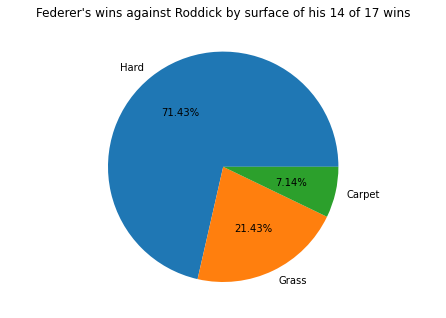

In [127]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['Hard', 'Grass', 'Carpet']
students = [10,3,1]
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.title("Federer's wins against Roddick by surface of his 14 of 17 wins")
plt.show()

# ------------------------------------------------------

## Nadal vs Roger Federer

In [203]:
#Player 1 is always alphabetically first - Andy
Nadal_Federer = df[df.player_1 == 'Rafael Nadal']
#Player 2 will be Roger
Nadal_Federer = Nadal_Federer[Nadal_Federer.player_2 == 'Roger Federer']

#They played 30 matches against each other
Nadal_Federer.shape

(30, 76)

In [204]:
Nadal_Federer[Nadal_Federer.winner == 'Roger Federer']

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,surface_Clay,surface_Grass,surface_Hard,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_R,player_2_hand_R,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF,total_games
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-06-26,2006-540,Wimbledon,Grass,128,G,127,6-0 7-6(5) 6-7(2) 6-3,5,F,178.0,Rafael Nadal,Roger Federer,20.062971,24.881588,NaN,NaN,L,R,185.0,185.0,104745,103819,ESP,SUI,Rafael Nadal,Roger Federer,2.0,1.0,4545.0,7260.0,2.0,1.0,9.0,13.0,3.0,1.0,127.0,119.0,94.0,83.0,64.0,64.0,14.0,20.0,19.0,20.0,4.0,1.0,10.0,3.0,Roger Federer,0.740157,0.697479,0.680851,0.771084,2.0,6.0,False,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,48
2006-11-13,2006-605,Masters Cup,Hard,8,F,4,6-4 7-5,3,SF,113.0,Rafael Nadal,Roger Federer,20.446270,25.264887,NaN,NaN,L,R,185.0,185.0,104745,103819,ESP,SUI,Rafael Nadal,Roger Federer,2.0,1.0,4270.0,7620.0,NaN,NaN,0.0,7.0,2.0,4.0,80.0,60.0,55.0,37.0,33.0,32.0,14.0,10.0,11.0,11.0,8.0,1.0,11.0,2.0,Roger Federer,0.687500,0.616667,0.600000,0.864865,1.0,3.0,False,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,22
2007-05-14,2007-414,Hamburg Masters,Clay,56,M,55,2-6 6-2 6-0,3,F,115.0,Rafael Nadal,Roger Federer,20.944559,25.763176,NaN,NaN,L,R,185.0,185.0,104745,103819,ESP,SUI,Rafael Nadal,Roger Federer,2.0,1.0,4875.0,7015.0,2.0,1.0,1.0,6.0,1.0,0.0,79.0,73.0,62.0,38.0,32.0,29.0,8.0,17.0,11.0,11.0,6.0,5.0,11.0,7.0,Roger Federer,0.784810,0.520548,0.516129,0.763158,2.0,5.0,False,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,22
2007-11-12,2007-605,Masters Cup,Hard,8,F,4,6-4 6-1,3,SF,59.0,Rafael Nadal,Roger Federer,21.442847,26.261465,NaN,NaN,L,R,185.0,185.0,104745,103819,ESP,SUI,Rafael Nadal,Roger Federer,2.0,1.0,5535.0,6530.0,NaN,NaN,1.0,11.0,1.0,0.0,39.0,48.0,28.0,39.0,17.0,32.0,6.0,5.0,8.0,9.0,1.0,1.0,4.0,1.0,Roger Federer,0.717949,0.812500,0.607143,0.820513,0.0,3.0,False,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,17
2010-11-21,2010-605,Tour Finals,Hard,8,F,5,6-3 3-6 6-1,3,F,98.0,Rafael Nadal,Roger Federer,24.470910,29.289528,NaN,NaN,L,R,185.0,185.0,104745,103819,ESP,SUI,Rafael Nadal,Roger Federer,1.0,2.0,11450.0,7645.0,NaN,NaN,1.0,7.0,1.0,1.0,66.0,64.0,51.0,40.0,33.0,37.0,10.0,14.0,12.0,13.0,0.0,1.0,3.0,2.0,Roger Federer,0.772727,0.625000,0.647059,0.925000,1.0,3.0,False,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,25
2011-11-20,2011-605,Tour Finals,Hard,16,F,2,6-3 6-0,3,RR,61.0,Rafael Nadal,Roger Federer,25.467488,30.286105,NaN,NaN,L,R,185.0,185.0,104745,103819,ESP,SUI,Rafael Nadal,Roger Federer,2.0,4.0,9375.0,6670.0,NaN,NaN,1.0,6.0,0.0,1.0,41.0,40.0,30.0,27.0,14.0,23.0,5.0,9.0,7.0,8.0,2.0,0.0,6.0,0.0,Roger Federer,0.731707,0.675000,0.466667,0.851852,0.0,4.0,False,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,15
2012-03-08,2012-404,Indian Wells Masters,Hard,96,M,94,6-3 6-4,3,SF,92.0,Rafael Nadal,Roger Federer,25.754962,30.573580,NaN,NaN,L,R,185.0,185.0,104745,103819,ESP,SUI,Rafael Nadal,Roger Federer,2.0,3.0,10415.0,8710.0,2.0,3.0,0.0,6.0,2.0,2.0,56.0,56.0,40.

In [205]:
Nadal_Federer[Nadal_Federer.winner == 'Rafael Nadal']

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,surface_Clay,surface_Grass,surface_Hard,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_R,player_2_hand_R,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF,total_games
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-03-22,2004-403,Miami Masters,Hard,96,M,65,6-3 6-3,3,R32,70.0,Rafael Nadal,Roger Federer,17.801506,22.620123,NaN,NaN,L,R,185.0,185.0,104745,103819,ESP,SUI,Rafael Nadal,Roger Federer,34.0,1.0,973.0,5635.0,32.0,1.0,1.0,8.0,2.0,2.0,48.0,56.0,39.0,34.0,31.0,21.0,5.0,13.0,9.0,9.0,0.0,4.0,0.0,7.0,Rafael Nadal,0.812500,0.607143,0.794872,0.617647,3.0,0.0,True,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,18
2006-04-17,2006-410,Monte Carlo Masters,Clay,64,M,63,6-2 6-7(2) 6-3 7-6(5),5,F,230.0,Rafael Nadal,Roger Federer,19.871321,24.689938,NaN,NaN,L,R,185.0,185.0,104745,103819,ESP,SUI,Rafael Nadal,Roger Federer,2.0,1.0,4135.0,6810.0,2.0,1.0,1.0,3.0,4.0,3.0,152.0,143.0,106.0,86.0,70.0,54.0,24.0,28.0,21.0,20.0,14.0,7.0,18.0,14.0,Rafael Nadal,0.697368,0.601399,0.660377,0.627907,7.0,4.0,True,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,50
2006-05-08,2006-416,Rome Masters,Clay,64,M,63,6-7(0) 7-6(5) 6-4 2-6 7-6(5),5,F,305.0,Rafael Nadal,Roger Federer,19.928816,24.747433,NaN,NaN,L,R,185.0,185.0,104745,103819,ESP,SUI,Rafael Nadal,Roger Federer,2.0,1.0,4135.0,7160.0,2.0,1.0,4.0,10.0,1.0,0.0,173.0,180.0,147.0,112.0,101.0,86.0,14.0,35.0,27.0,27.0,6.0,6.0,10.0,9.0,Rafael Nadal,0.849711,0.622222,0.687075,0.767857,3.0,4.0,True,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,67
2006-05-29,2006-520,Roland Garros,Clay,128,G,127,1-6 6-1 6-4 7-6(4),5,F,182.0,Rafael Nadal,Roger Federer,19.986311,24.804928,NaN,NaN,L,R,185.0,185.0,104745,103819,ESP,SUI,Rafael Nadal,Roger Federer,2.0,1.0,4545.0,7010.0,2.0,1.0,3.0,8.0,0.0,1.0,111.0,119.0,85.0,72.0,59.0,49.0,17.0,25.0,18.0,18.0,7.0,8.0,10.0,12.0,Rafael Nadal,0.765766,0.605042,0.694118,0.680556,4.0,3.0,True,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,41
2007-04-15,2007-410,Monte Carlo Masters,Clay,56,M,55,6-4 6-4,3,F,95.0,Rafael Nadal,Roger Federer,20.867899,25.686516,NaN,NaN,L,R,185.0,185.0,104745,103819,ESP,SUI,Rafael Nadal,Roger Federer,2.0,1.0,4875.0,7290.0,2.0,1.0,1.0,3.0,1.0,4.0,66.0,66.0,52.0,36.0,38.0,26.0,8.0,13.0,10.0,10.0,3.0,6.0,3.0,8.0,Rafael Nadal,0.787879,0.545455,0.730769,0.722222,2.0,0.0,True,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,20
2007-05-28,2007-520,Roland Garros,Clay,128,G,127,6-3 4-6 6-3 6-4,5,F,190.0,Rafael Nadal,Roger Federer,20.982888,25.801506,NaN,NaN,L,R,185.0,185.0,104745,103819,ESP,SUI,Rafael Nadal,Roger Federer,2.0,1.0,5225.0,7515.0,2.0,1.0,2.0,9.0,1.0,1.0,137.0,118.0,106.0,76.0,74.0,50.0,17.0,23.0,19.0,19.0,16.0,6.0,17.0,10.0,Rafael Nadal,0.773723,0.644068,0.698113,0.657895,4.0,1.0,True,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,38
2008-04-20,2008-410,Monte Carlo Masters,Clay,56,M,55,7-5 7-5,3,F,103.0,Rafael Nadal,Roger Federer,21.883641,26.702259,NaN,NaN,L,R,185.0,185.0,104745,103819,ESP,SUI,Rafael Nadal,Roger

In [206]:
#setting year column
Nadal_Federer['year'] = (Nadal_Federer['tourney_id'].str[0:4]).astype(int)

#displaying wins by each player
Nadal_Federer.winner.value_counts()

Rafael Nadal     19
Roger Federer    11
Name: winner, dtype: int64

In [207]:
Nadal_Federer.year

tourney_date
2004-03-22    2004
2006-04-17    2006
2006-05-08    2006
2006-05-29    2006
2006-06-26    2006
2006-11-13    2006
2007-04-15    2007
2007-05-14    2007
2007-05-28    2007
2007-11-12    2007
2008-04-20    2008
2008-05-11    2008
2008-05-25    2008
2008-06-23    2008
2009-01-19    2009
2010-05-09    2010
2010-11-21    2010
2011-03-23    2011
2011-11-20    2011
2012-03-08    2012
2013-03-07    2013
2013-05-12    2013
2013-08-11    2013
2013-11-04    2013
2014-01-13    2014
2015-10-26    2015
2017-01-16    2017
2017-10-09    2017
2019-05-27    2019
2019-07-01    2019
Name: year, dtype: int64

In [208]:
years = [i for i in range(1999, 2020)]
fedwins = [0 for i in range(1999, 2020)]
nadwins = [0 for i in range(1999, 2020)]

for index, row in Nadal_Federer.iterrows():
    if row['winner'] == "Rafael Nadal":
        nadwins[row['year'] - 1999] += 1
    elif row['winner'] == "Roger Federer":
        fedwins[row['year'] - 1999] += 1


ValueError: shape mismatch: objects cannot be broadcast to a single shape

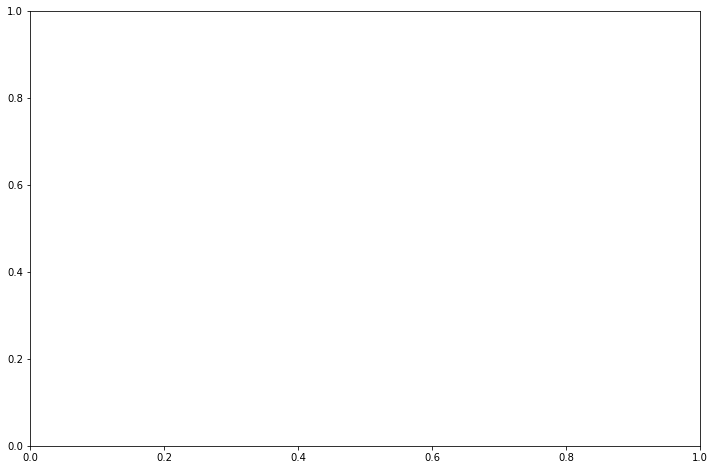

In [210]:
plt.figure(figsize=(12,8))

#barwith and position
barWidth = 0.4
b1 = np.arange(len(fedwins))
b2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, fedwins, color='#9ACD32', width=barWidth, edgecolor='white', label='Federer wins')
plt.bar(r2, nadwins, color='#FFD700', width=barWidth, edgecolor='white', label='Nadal wins')
 
# Add xticks on the middle of the group bars
plt.title('Plotting Roger Federer vs Rafael Nadal over the years', fontweight='bold')
plt.xticks([r + barWidth - 0.2 for r in range(len(fedwins))], [i for i in range(1999, 2020)])
plt.xlabel("Year")
plt.ylabel("# of Wins");
 
# Create legend & Show graphic
plt.legend();    

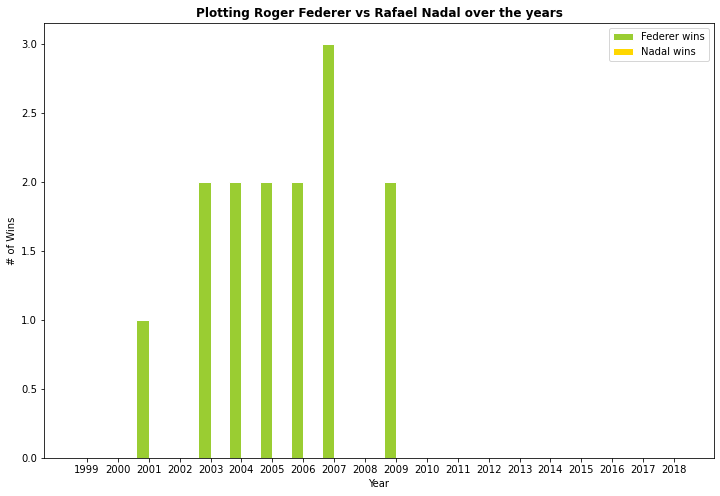

In [138]:
####
plt.figure(figsize=(12,8))

#barwith and position
barWidth = 0.4
b1 = np.arange(len(fedwins))
b2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, fedwins, color='#9ACD32', width=barWidth, edgecolor='white', label='Federer wins')
plt.bar(r2, nadwins, color='#FFD700', width=barWidth, edgecolor='white', label='Nadal wins')
 
# Add xticks on the middle of the group bars
plt.title('Plotting Roger Federer vs Rafael Nadal over the years', fontweight='bold')
plt.xticks([r + barWidth - 0.2 for r in range(len(fedwins))], [i for i in range(1999, 2019)])
plt.xlabel("Year")
plt.ylabel("# of Wins");
 
# Create legend & Show graphic
plt.legend();    

In [ ]:
df = pd.read_csv('ATPTotal.csv')
df.head(1)

In [ ]:
columns_to_rename = {
                     'winner_id' : 'winner_id',
                     'winner_seed': 'winner_seed',
                     'winner_entry': 'winner_entry',
                     'winner_name': 'winner_name',
                     'winner_hand': 'winner_hand',
                     'winner_ht': 'winner_ht',
                     'winner_ioc': 'winner_ioc',
                     'winner_age': 'winner_age',
                     'loser_id': 'loser_id',
                     'loser_seed': 'loser_seed',
                     'loser_entry': 'loser_entry',
                     'loser_name': 'loser_name',
                     'loser_hand': 'loser_hand',
                     'loser_ht': 'loser_ht',
                     'loser_ioc': 'loser_ioc',
                     'loser_age': 'loser_age',
                     'w_aces': "winner_aces",
                     'w_double_faults': 'winner_double_faults',
                     'w_service_points': 'winner_service_points',
                     'w_first_serves_in': 'winner_first_serves_in',
                     'w_first_serve_points_won': 'winner_first_serve_points_won',
                     'w_second_serve_points_won': 'winner_second_serve_points_won',
                     'w_second_serve_points_won': 'winner_second_serve_points_won',
                     'w_service_game_total': 'winner_service_game_total',
                     'w_break_points_saved': 'winner_break_points_saved',
                     'w_break_points_faced': 'winner_break_points_faced',
                     'l_aces': "loser_aces",
                     'l_double_faults': 'loser_double_faults',
                     'l_service_points': 'loser_service_points',
                     'l_first_serves_in': 'loser_first_serves_in',
                     'l_first_serve_points_won': 'loser_first_serve_points_won',
                     'l_second_serve_points_won': 'loser_second_serve_points_won',
                     'l_second_serve_points_won': 'loser_second_serve_points_won',
                     'l_service_game_total': 'loser_service_game_total',
                     'l_break_points_saved': 'loser_break_points_saved',
                     'l_break_points_faced': 'loser_break_points_faced',
                     'winner_rank': 'winner_rank',
                     'winner_rank_points': 'winner_rank_points',
                     'loser_rank': 'loser_rank',
                     'loser_rank_points': 'loser_rank_points'}

df = df.rename(columns = columns_to_rename)
#df = df.rename(columns = columns_to_rename)

df.head(1)

In [ ]:
columns_to_rename= {
                     'w_aces': "winner_aces",
                     'w_double_faults': 'winner_double_faults',
                     'w_service_points': 'winner_service_points',
                     'w_first_serves_in': 'winner_first_serves_in',
                     'w_first_serve_points_won': 'winner_first_serve_points_won',
                     'w_second_serve_points_won': 'winner_second_serve_points_won',
                     'w_second_serve_points_won': 'winner_second_serve_points_won',
                     'w_service_game_total': 'winner_service_game_total',
                     'w_break_points_saved': 'winner_break_points_saved',
                     'w_break_points_faced': 'winner_break_points_faced',
                     'l_aces': "loser_aces",
                     'l_double_faults': 'loser_double_faults',
                     'l_service_points': 'loser_service_points',
                     'l_first_serves_in': 'loser_first_serves_in',
                     'l_first_serve_points_won': 'loser_first_serve_points_won',
                     'l_second_serve_points_won': 'loser_second_serve_points_won',
                     'l_second_serve_points_won': 'loser_second_serve_points_won',
                     'l_service_game_total': 'loser_service_game_total',
                     'l_break_points_saved': 'loser_break_points_saved',
                     'l_break_points_faced': 'loser_break_points_faced'}

df = df.rename(columns = columns_to_rename)
df.head(1)

In [ ]:
WL_extensions = ['age', 'entry', 'hand', 'ht', 'id', 'ioc', 'name', 'rank', 'rank_points', 'seed',
                'aces' ,'double_faults', 'service_points', 'first_serves_in', 
                 'first_serve_points_won', 'second_serve_points_won','service_game_total', 'break_points_saved',
                'break_points_faced']

def obscure_features(DF):
    '''
    We replace 'winner' and 'loser' with 'player_1' and 'player_2' (not necessarily in that order)
    'player_1' replaces the name of the player that comes first alphabetically
    The purpose of this is to predict the winner of a match without the data being tied to
    the known winner or loser.
    '''
    DF['player_1'] = pd.concat([DF['winner_name'], DF['loser_name']], axis = 1).min(axis = 1)
    DF['player_2'] = pd.concat([DF['winner_name'], DF['loser_name']], axis = 1).max(axis = 1)
    
    for ext in WL_extensions:
        p1_feature = np.where(DF['player_1'] == DF['winner_name'],
                     DF['winner_' + ext],
                     DF['loser_' + ext])
    
        p2_feature = np.where(DF['player_2'] == DF['winner_name'],
                     DF['winner_' + ext],
                     DF['loser_' + ext])
    
        DF['player_1_' + ext] = p1_feature
        DF['player_2_' + ext] = p2_feature
        
    winner_cols = list(filter(lambda x: x.startswith('winner'), DF.columns))
    loser_cols = list(filter(lambda x: x.startswith('loser'), DF.columns))
    cols_to_drop = winner_cols + loser_cols
    
    target = DF['winner_name']
    
    DF.drop(cols_to_drop, axis = 1, inplace = True)
    
    DF['winner'] = target
    
    return DF

In [ ]:
df = obscure_features(df)

In [ ]:
WL_extensions = ['age', 'entry', 'hand', 'ht', 'id', 'ioc', 'name', 'rank', 'rank_points', 'seed',
                'aces' ,'double_faults', 'service_points', 'first_serves_in', 
                 'first_serve_points_won', 'second_serve_points_won','service_game_total', 'break_points_saved',
                'break_points_faced']

def obscure_features(DF):
    '''
    We replace 'winner' and 'loser' with 'player_1' and 'player_2' (not necessarily in that order)
    'player_1' replaces the name of the player that comes first alphabetically
    The purpose of this is to predict the winner of a match without the data being tied to
    the known winner or loser.
    '''
    DF['player_1'] = pd.concat([DF['winner_name'], DF['loser_name']], axis = 1).min(axis = 1)
    DF['player_2'] = pd.concat([DF['winner_name'], DF['loser_name']], axis = 1).max(axis = 1)
    
    for ext in WL_extensions:
        p1_feature = np.where(DF['player_1'] == DF['winner_name'],
                     DF['winner_' + ext],
                     DF['loser_' + ext])
    
        p2_feature = np.where(DF['player_2'] == DF['winner_name'],
                     DF['winner_' + ext],
                     DF['loser_' + ext])
    
        DF['player_1_' + ext] = p1_feature
        DF['player_2_' + ext] = p2_feature
        
    winner_cols = list(filter(lambda x: x.startswith('winner'), DF.columns))
    loser_cols = list(filter(lambda x: x.startswith('loser'), DF.columns))
    cols_to_drop = winner_cols + loser_cols
    
    target = DF['winner_name']
    
    DF.drop(cols_to_drop, axis = 1, inplace = True)
    
    DF['winner'] = target
    
    return DF

In [ ]:
df = obscure_features(df)

In [ ]:
# columns_to_rename = {'winner_id' : 'Player1_id',
#                      'winner_seed': 'Player1_seed',
#                      'winner_entry': 'Player1_entry',
#                      'winner_name': 'Player1_name',
#                      'winner_hand': 'Player1_hand',
#                      'winner_ht': 'Player1_ht',
#                      'winner_ioc': 'Player1_ioc',
#                      'winner_age': 'Player1_age',
#                      'loser_id': 'Player2_id',
#                      'loser_seed': 'Player2_seed',
#                      'loser_entry': 'Player2_entry',
#                      'loser_name': 'Player2_name',
#                      'loser_hand': 'Player2_hand',
#                      'loser_ht': 'Player2_ht',
#                      'loser_ioc': 'Player2_ioc',
#                      'loser_age': 'Player2_age',
#                      'w_aces': "Player1_aces",
#                      'w_double_faults': 'Player1_double_faults',
#                      'w_service_points': 'Player1_service_points',
#                      'w_first_serves_in': 'Player1_first_serves_in',
#                      'w_first_serve_points_won': 'Player1_first_serve_points_won',
#                      'w_second_serve_points_won': 'Player1_second_serve_points_won',
#                      'w_second_serve_points_won': 'Player1_second_serve_points_won',
#                      'w_service_game_total': 'Player1_service_game_total',
#                      'w_break_points_saved': 'Player1_break_points_saved',
#                      'w_break_points_faced': 'Player1_break_points_faced',
#                      'l_aces': "Player2_aces",
#                      'l_double_faults': 'Player2_double_faults',
#                      'l_service_points': 'Player2_service_points',
#                      'l_first_serves_in': 'Player2_first_serves_in',
#                      'l_first_serve_points_won': 'Player2_first_serve_points_won',
#                      'l_second_serve_points_won': 'Player2_second_serve_points_won',
#                      'l_second_serve_points_won': 'Player2_second_serve_points_won',
#                      'l_service_game_total': 'Player2_service_game_total',
#                      'l_break_points_saved': 'Player2_break_points_saved',
#                      'l_break_points_faced': 'Player2_break_points_faced',
#                      'winner_rank': 'Player1_rank',
#                      'winner_rank_points': 'Player1_rank_points',
#                      'loser_rank': 'Player2_rank',
#                      'loser_rank_points': 'Player2_rank_points'
                     
                
    
    
    
    
    
# }
# df = df.rename(columns = columns_to_rename)
# df
# df['Player1_first_serve_%'] = df['Player1_first_serves_in'] / df['Player1_service_points']
# df['Player2_first_serve_%'] = df['Player2_first_serves_in'] / df['Player2_service_points']


# df['Player1_first_serve_win_%'] = df['Player1_first_serve_points_won'] / df['Player1_first_serves_in']
# df['Player2_first_serve_win_%'] = df['Player2_first_serve_points_won'] / df['Player2_first_serves_in']

# df['Player1_break_points_won'] = df['Player1_break_points_faced']- df['Player1_break_points_saved']
# df['Player2_break_points_won'] = df['Player2_break_points_faced']- df['Player2_break_points_saved']

In [ ]:
# WL_extensions = ['age', 'entry', 'hand', 'ht', 'id', 'ioc', 'name', 'rank', 'rank_points', 'seed',
#                 'aces' ,'double_faults', 'service_points', 'first_serves_in', 
#                  'first_serve_points_won', 'second_serve_points_won','service_game_total', 'break_points_saved',
#                 'break_points_faced']

# def obscure_features(DF):
#     '''
#     We replace 'winner' and 'loser' with 'player_1' and 'player_2' (not necessarily in that order)
#     'player_1' replaces the name of the player that comes first alphabetically
#     The purpose of this is to predict the winner of a match without the data being tied to
#     the known winner or loser.
#     '''
#     DF['player_1'] = pd.concat([DF['winner_name'], DF['loser_name']], axis = 1).min(axis = 1)
#     DF['player_2'] = pd.concat([DF['winner_name'], DF['loser_name']], axis = 1).max(axis = 1)
    
#     for ext in WL_extensions:
#         p1_feature = np.where(DF['player_1'] == DF['winner_name'],
#                      DF['winner_' + ext],
#                      DF['loser_' + ext])
    
#         p2_feature = np.where(DF['player_2'] == DF['winner_name'],
#                      DF['winner_' + ext],
#                      DF['loser_' + ext])
    
#         DF['player_1_' + ext] = p1_feature
#         DF['player_2_' + ext] = p2_feature
        
#     winner_cols = list(filter(lambda x: x.startswith('winner'), DF.columns))
#     loser_cols = list(filter(lambda x: x.startswith('loser'), DF.columns))
#     cols_to_drop = winner_cols + loser_cols
    
#     target = DF['winner_name']
    
#     DF.drop(cols_to_drop, axis = 1, inplace = True)
    
#     DF['winner'] = target
    
#     return D

In [ ]:
df['player_1_first_serve_%'] = df['player_1_first_serves_in'] / df['player_1_service_points']
df['player_2_first_serve_%'] = df['player_2_first_serves_in'] / df['player_2_service_points']


df['player_1_first_serve_win_%'] = df['player_1_first_serve_points_won'] / df['player_1_first_serves_in']
df['player_2_first_serve_win_%'] = df['player_2_first_serve_points_won'] / df['player_2_first_serves_in']

df['player_1_break_points_won'] = df['player_2_break_points_faced']- df['player_2_break_points_saved']
df['player_2_break_points_won'] = df['player_1_break_points_faced']- df['player_1_break_points_saved']


In [ ]:
df.head(1)

In [ ]:
df[df.player_1_ht.isnull()]

Some of the features we discussed also appear in this article:
Surface win percent: A player's win percent on the current match's court surface prior to the match.
Level win percent: A player's win percent at a current match's tournament level prior to the match.
Head-to-head: The number of matches won by the player against her current opponent prior to the match.
Recent form: A player's overall win percent prior to the current match, plus a "penalty" of log10(1-(overall win %)+(last 6 months win %)).